Подготовка среды (выполнялось в google colab)

In [ ]:
!pip install ultralytics==8.0.28 roboflow clearml

In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=4BT3HOPTLAXJUG5WFQFB
%env CLEARML_API_SECRET_KEY=s6QmiXOarwm6fIaA2HlMn0HqHZaqRou0RBlGGRrBWUMVcZlg6D

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=4BT3HOPTLAXJUG5WFQFB
env: CLEARML_API_SECRET_KEY=s6QmiXOarwm6fIaA2HlMn0HqHZaqRou0RBlGGRrBWUMVcZlg6D


In [ ]:
import locale
import glob

from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image, display

In [ ]:
#данный код необходимо выполнить для корректной работы colab как командной строки
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

print(locale.getpreferredencoding())

UTF-8
UTF-8


Загрузка набора данных

In [ ]:
rf = Roboflow(api_key="VEwiu7CVskOWGtETkQHe")
project = rf.workspace("nikita-sidelnikov").project("oil-0ayo3")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`

In [ ]:
!cp -r "./oil-4" "./datasets"

bin	 datasets  lib	   media		     proc	 sbin  tools
boot	 dev	   lib32   mnt			     python-apt  srv   usr
content  etc	   lib64   NGC-DL-CONTAINER-LICENSE  root	 sys   var
datalab  home	   libx32  opt			     run	 tmp
oil-4


In [ ]:
model = YOLO('yolov8n-seg.pt')

model.train(
    data = '/content/datasets/oil-4/data.yaml',
    epochs = 30,
    imgsz = 640
)

NameError: ignored

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train6/weights/best.pt conf=0.2 source=datasets/oil/test/images save=true

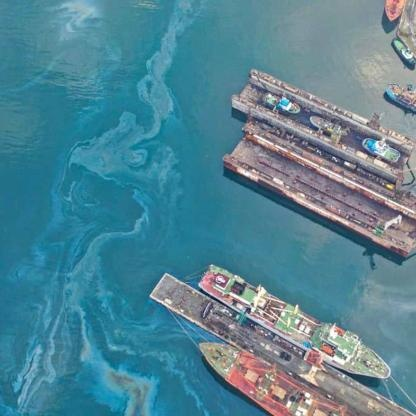

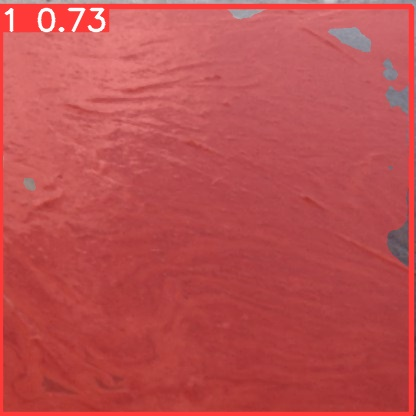

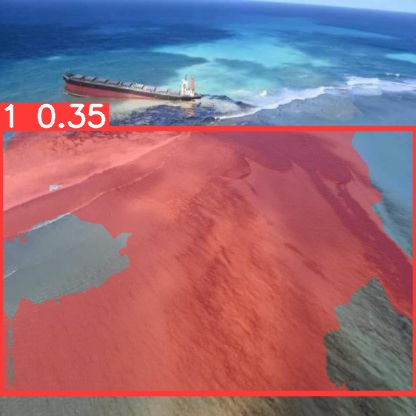

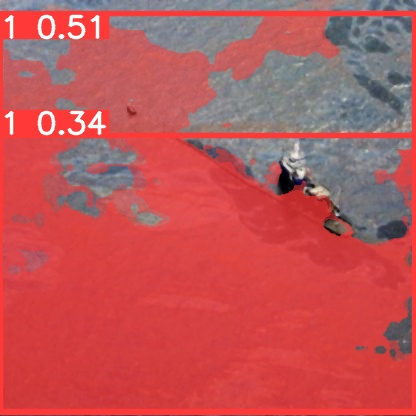

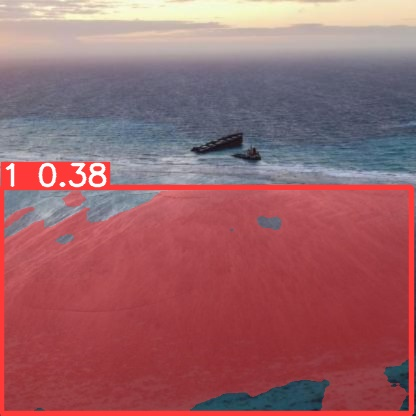

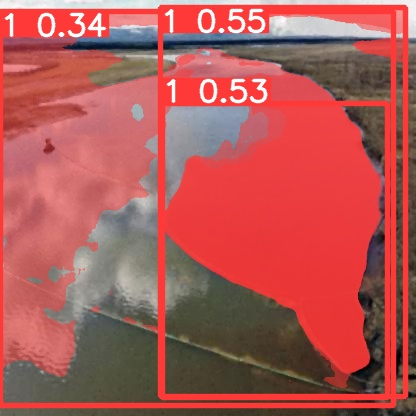

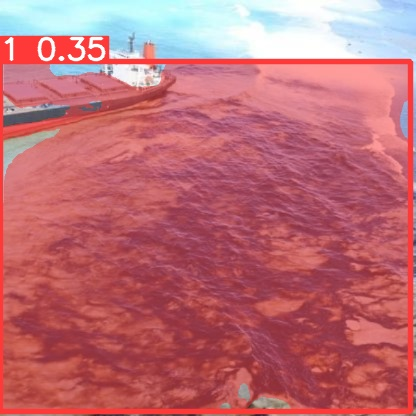

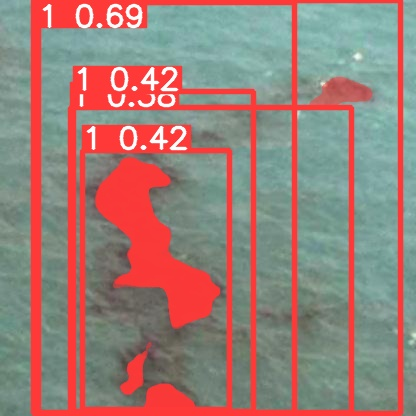

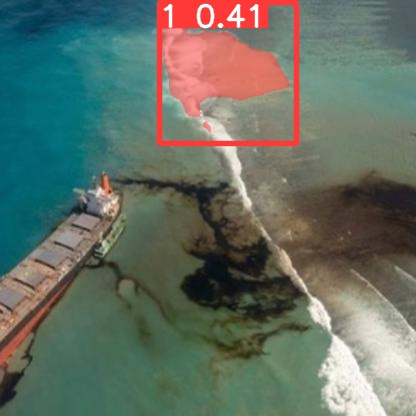

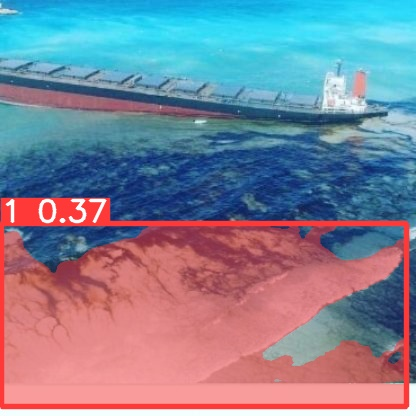

In [ ]:
for image_path in glob.glob(f'runs/segment/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")